# Python Crash Course: Statistical Analysis of a CSV

This notebook walks through:

1. Basic Python syntax via real data
2. Loading and exploring a CSV with `pandas`
3. Descriptive statistics
4. Plotting with `matplotlib`
5. OLS regression with `statsmodels`
6. Fixed effects regression

Dataset: `python_intro_stats_dataset.csv` (panel data for firms over years).

In [36]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from linearmodels.panel import PanelOLS

## 1. Load the CSV

Make sure the file `python_intro_stats_dataset.csv` is in the same folder as this notebook.

In [37]:
df = pd.read_csv('python_intro_stats_dataset.csv')
df.head()

,firm_id,year,x1,x2,size,y
0,1,2015,0.750451,0.940565,7.242801,0.684479
1,1,2016,-1.302180,0.127840,7.242801,1.383529
2,1,2017,-0.016801,-0.853044,7.242801,4.397915
3,1,2018,0.777792,0.066031,7.242801,5.121895
4,1,2019,0.467509,-0.859292,7.242801,4.877840


## 2. Quick Python Syntax Refresher

We'll briefly review variables, lists, dictionaries, and functions.

In [38]:
# Basic types
x = 10
name = "Alice"
values = [1, 2, 3]
record = {"a": 10, "b": 20}

print(type(x), x)
print(type(name), name)
print(type(values), values)
print(type(record), record)

# Indexing
print("First value in list:", values[0])
print("Value for key 'a' in dict:", record["a"])

<class 'int'> 10
<class 'str'> Alice
<class 'list'> [1, 2, 3]
<class 'dict'> {'a': 10, 'b': 20}
First value in list: 1
Value for key 'a' in dict: 10


In [61]:
# Functions loops and indentation
def twice(z):
    return 2 * z

print(twice(5))
li = []
di = {}
for i in range(5):
    if i % 2:
        li.append(twice(i))
        di[f'item{i}'] = f'{np.log(i+1)}'

print(li, '\n', di)

10
[2, 6] 
 {'item1': '0.6931471805599453', 'item3': '1.3862943611198906'}


## 3. Descriptive Statistics

We'll compute some summary statistics and look at missing values.

In [40]:
df.describe()

,firm_id,year,x1,x2,size,y
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,10.500000,2019.500000,0.025714,-0.046217,14.007430,3.122752
std,5.780751,2.879489,1.002115,0.978808,6.048256,2.214636
min,1.000000,2015.000000,-2.566658,-2.964529,7.242801,-3.686210
25%,5.750000,2017.000000,-0.703457,-0.640923,8.405480,1.660640
50%,10.500000,2019.500000,0.021563,0.036497,11.618658,3.134455
75%,15.250000,2022.000000,0.639135,0.517605,18.160256,4.487740
max,20.000000,2024.000000,2.913862,2.905067,25.297919,8.648476


In [41]:
# Missing values per column
df.isna().sum()

firm_id    0
year       0
x1         0
x2         0
size       0
y          0
dtype: int64

In [42]:
# Example: mean and standard deviation of y
print("Mean of y:", df['y'].mean())
print("Std of y:", df['y'].std())

Mean of y: 3.1227516534357203
Std of y: 2.2146364053845518


### Grouped statistics

For example, the mean of `y` by `firm_id`.

In [43]:
df.groupby('firm_id')['y'].mean().head()

firm_id
1    3.891338
2    2.147749
3    4.718220
4    0.327054
5    1.966776
Name: y, dtype: float64

## 4. Plotting

We'll create a histogram of `y` and a scatter plot of `x1` vs `y`.

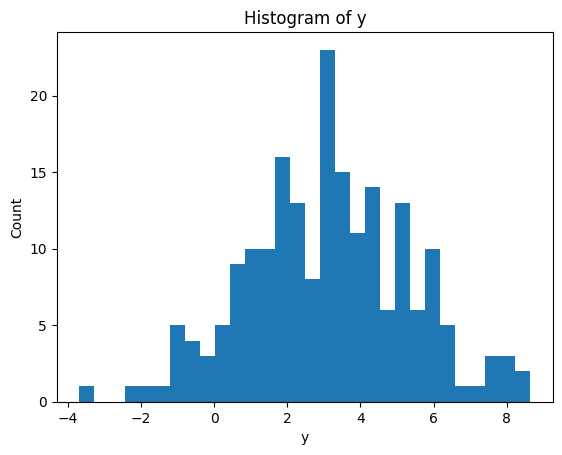

In [44]:
# Histogram of y
plt.hist(df['y'], bins=30)
plt.xlabel('y')
plt.ylabel('Count')
plt.title('Histogram of y')
plt.show()

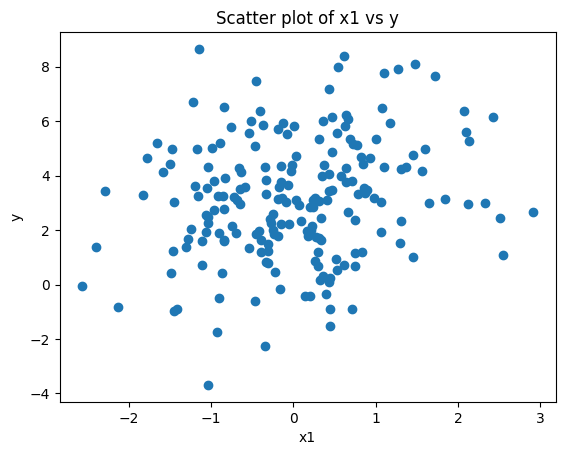

In [45]:
# Scatter plot: x1 vs y
plt.scatter(df['x1'], df['y'])
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Scatter plot of x1 vs y')
plt.show()

## 5. OLS Regression with statsmodels

We'll estimate the model:

$$ y = \beta_0 + \beta_1 x1 + \beta_2 x2 + \epsilon $$

In [46]:
# Define X and y
X = df[['x1', 'x2']]
X = sm.add_constant(X)  # adds intercept
y = df['y']

ols_model = sm.OLS(y, X).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     6.032
Date:                Sun, 07 Dec 2025   Prob (F-statistic):            0.00287
Time:                        10:58:06   Log-Likelihood:                -436.36
No. Observations:                 200   AIC:                             878.7
Df Residuals:                     197   BIC:                             888.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0978      0.153     20.241      0.000       2.796       3.400
x1             0.5172      0.155      3.328      0.001       0.211       0.824
x2            -0.2511      0.159     -1.578      0.116      -0.565       0.063
==============================================================================
Omnibus:                        0.001   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.056
Skew:                           0.005   Prob(JB):                        0.973
Kurtosis:                       2.919   Cond. No.                         1.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residuals and fitted values

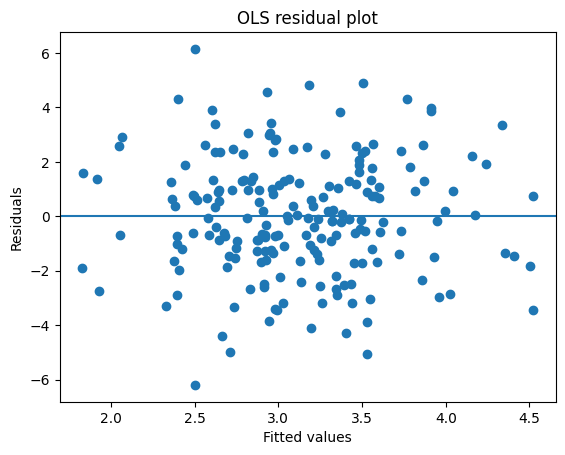

In [68]:
df['fitted_ols'] = ols_model.fittedvalues
df['resid_ols'] = ols_model.resid

plt.scatter(df['fitted_ols'], df['resid_ols'])
plt.axhline(0)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('OLS residual plot')
plt.savefig('./regression_plot.png')
plt.show()
plt.close()

## 6. Fixed Effects via Dummy Variables

We'll estimate a model with firm fixed effects by adding firm dummies.

In [48]:
# Create firm dummies
df_fe = pd.get_dummies(df, columns=['firm_id'], drop_first=True)
df_fe.head()

,year,x1,x2,size,y,fitted_ols,resid_ols,firm_id_2,firm_id_3,firm_id_4,...,firm_id_11,firm_id_12,firm_id_13,firm_id_14,firm_id_15,firm_id_16,firm_id_17,firm_id_18,firm_id_19,firm_id_20
0,2015,0.750451,0.940565,7.242801,0.684479,3.249821,-2.565342,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2016,-1.302180,0.127840,7.242801,1.383529,2.392239,-1.008709,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2017,-0.016801,-0.853044,7.242801,4.397915,3.303353,1.094562,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2018,0.777792,0.066031,7.242801,5.121895,3.483554,1.638341,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2019,0.467509,-0.859292,7.242801,4.877840,3.555415,1.322425,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
# Choose regressors: x1, x2, and firm dummies
fe_cols = ['x1', 'x2'] + [c for c in df_fe.columns if c.startswith('firm_id_')]
X_fe = df_fe[fe_cols].astype(float)
X_fe = sm.add_constant(X_fe)
y_fe = df_fe['y']

fe_model_dummies = sm.OLS(y_fe, X_fe).fit()
fe_model_dummies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     19.94
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           3.12e-36
Time:                        10:58:06   Log-Likelihood:                -321.32
No. Observations:                 200   AIC:                             686.6
Df Residuals:                     178   BIC:                             759.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9352      0.405      9.723      0.000       3.137       4.734
x1             0.7034      0.096      7.314      0.000       0.514       0.893
x2            -0.3997      0.099     -4.032      0.000      -0.595      -0.204
firm_id_2     -1.5940      0.572     -2.786      0.006      -2.723      -0.465
firm_id_3      0.7555      0.574      1.317      0.190      -0.377       1.888
firm_id_4     -3.5470      0.572     -6.202      0.000      -4.676      -2.418
firm_id_5     -2.1281      0.573     -3.712      0.000      -3.260      -0.997
firm_id_6     -2.4727      0.574     -4.311      0.000      -3.605      -1.341
firm_id_7     -1.3859      0.573     -2.418      0.017      -2.517      -0.255
firm_id_8     -0.7822      0.574     -1.364      0.174      -1.914       0.350
firm_id_9      0.0485      0.572      0.085      0.933      -1.080       1.177
firm_id_10    -1.2296      0.573     -2.146      0.033      -2.361      -0.099
firm_id_11     0.9058      0.572      1.584      0.115      -0.223       2.035
firm_id_12    -1.4078      0.577     -2.438      0.016      -2.547      -0.268
firm_id_13    -3.9339      0.576     -6.829      0.000      -5.071      -2.797
firm_id_14     1.4774      0.574      2.576      0.011       0.346       2.609
firm_id_15     2.3965      0.575      4.168      0.000       1.262       3.531
firm_id_16    -0.2934      0.575     -0.510      0.611      -1.428       0.842
firm_id_17    -0.3919      0.572     -0.685      0.494      -1.521       0.737
firm_id_18    -1.3267      0.572     -2.318      0.022      -2.456      -0.197
firm_id_19     1.9199      0.574      3.342      0.001       0.786       3.053
firm_id_20    -3.9902      0.575     -6.936      0.000      -5.126      -2.855
==============================================================================
Omnibus:                        0.065   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.094
Skew:                          -0.042   Prob(JB):                        0.954
Kurtosis:                       2.935   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 7. Fixed Effects with `linearmodels` (Optional)

If `linearmodels` is installed, we can treat this as panel data and estimate entity fixed effects directly.

In [50]:

df_panel = df.set_index(['firm_id', 'year'])
fe_model_panel = PanelOLS.from_formula('y ~ x1 + x2 + EntityEffects', data=df_panel).fit()
print(fe_model_panel.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:                      y   R-squared:                        0.2504
Estimator:                   PanelOLS   R-squared (Between):             -0.0019
No. Observations:                 200   R-squared (Within):               0.2504
Date:                Sun, Dec 07 2025   R-squared (Overall):              0.0316
Time:                        10:58:06   Log-likelihood                   -321.32
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      29.729
Entities:                          20   P-value                           0.0000
Avg Obs:                      10.0000   Distribution:                   F(2,178)
Min Obs:                      10.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             29.729
                            

## 8. Mini-Exercise

Try the following on your own:

1. Add `size` as an additional regressor in the OLS model.
2. Estimate a model `y ~ x1 + x2 + size` with and without firm fixed effects.
3. Compare the coefficients on `x1` and `x2` across the models.
4. Plot the predicted vs actual `y` for one of your models.